In [16]:
from fitsio import FITS
import fitsio
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits
import numpy as np
import os
from matplotlib.pyplot import rcParams
import matplotlib._color_data as mcd
rcParams['figure.figsize'] = 10, 5
rcParams['lines.linewidth'] = 2
rcParams['axes.labelsize'] = 15
rcParams['legend.fontsize'] = 12

names = {name for name in mcd.CSS4_COLORS if "xkcd:" + name in mcd.XKCD_COLORS}
colors = sorted(names, reverse=True)

In [17]:
dir_total = '/global/cscratch1/sd/tanting/picca_convergence/'

# Mock with 20bins

In [18]:
dir_LYA = dir_total+'Delta_20bins_mock/Delta_calibration/Log'
files_LYA = []
for i in range(1,20):
    files_LYA.append('delta_attributes_iteration{}.fits.gz'.format(i))
#files_LYA = np.sort([file for file in os.listdir(dir_LYA) if file.startswith('delta_attributes_iteration')])
loglam_LYA = []
loglam_rest_LYA = []
eta_LYA = []
var_lss_LYA = []
fudge_LYA = []
mean_cont_LYA = []

for index in range(19):
    document_LYA = FITS(dir_LYA + '/' + files_LYA[index],vstorage='object')
    loglam_LYA.append(document_LYA['WEIGHT']['loglam'][:])
    loglam_rest_LYA.append(document_LYA['CONT']['loglam_rest'][:])
    eta_LYA.append(document_LYA['WEIGHT']['eta'][:])
    var_lss_LYA.append(document_LYA['WEIGHT']['var_lss'][:])
    fudge_LYA.append(document_LYA['WEIGHT']['fudge'][:])
    mean_cont_LYA.append(document_LYA['CONT']['mean_cont'][:])

# Mock with 20bins jean_marc method

In [19]:
dir_compare_LYA = dir_total+'Delta_20bins_mock_jeanmarc_0.5/Delta_calibration/Log'
files_compare_LYA = []
for i in range(1,20):
    files_compare_LYA.append('delta_attributes_iteration{}.fits.gz'.format(i))
#files_compare_LYA = np.sort([file for file in os.listdir(dir_compare_LYA) if file.startswith('delta_attributes_iteration')])
loglam_compare_LYA = []
loglam_rest_compare_LYA = []
eta_compare_LYA = []
var_lss_compare_LYA = []
fudge_compare_LYA = []
mean_cont_compare_LYA = []

for index in range(19):
    document_compare_LYA = FITS(dir_compare_LYA + '/' + files_compare_LYA[index],vstorage='object')
    loglam_compare_LYA.append(document_compare_LYA['WEIGHT']['loglam'][:])
    loglam_rest_compare_LYA.append(document_compare_LYA['CONT']['loglam_rest'][:])
    eta_compare_LYA.append(document_compare_LYA['WEIGHT']['eta'][:])
    var_lss_compare_LYA.append(document_compare_LYA['WEIGHT']['var_lss'][:])
    fudge_compare_LYA.append(document_compare_LYA['WEIGHT']['fudge'][:])
    mean_cont_compare_LYA.append(document_compare_LYA['CONT']['mean_cont'][:])

# Comparison

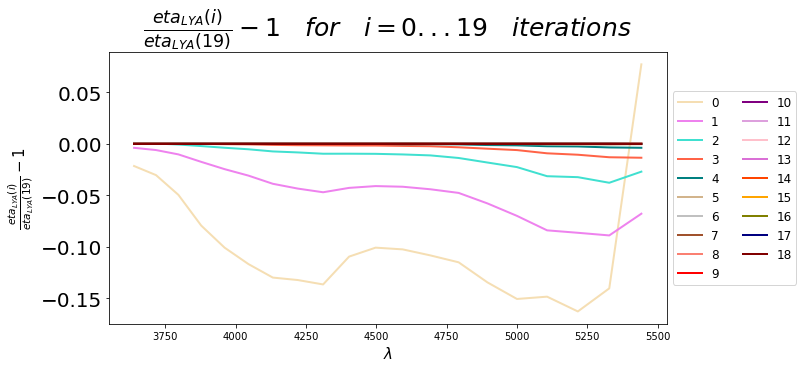

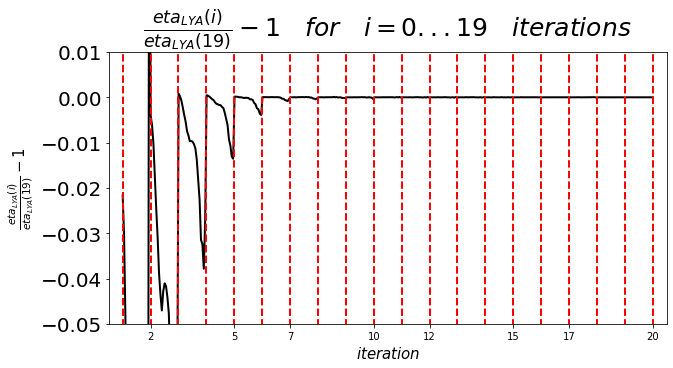

In [30]:
plt.figure()
plt.title(r'$\frac{eta_{LYA}(i)}{eta_{LYA}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
for num,color in zip(range(19),colors[3:]):
    plt.plot(10**loglam_LYA[num],eta_LYA[num]/eta_LYA[-1]-1,label = '%s'%num, color=color)
#plt.plot(10**loglam_LYA[-1],eta_LYA[-1]/eta_LYA[-1]-1,label = '19',color = 'black')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\frac{eta_{LYA}(i)}{eta_{LYA}(19)}-1$')
plt.yticks(fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),ncol=2)
plt.show()

plt.figure()
plt.title(r'$\frac{eta_{LYA}(i)}{eta_{LYA}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
diff = np.array(eta_LYA).reshape(-1)/np.tile(eta_LYA[-1],19)-1
plt.plot(np.linspace(1,20,len(np.array(eta_LYA).reshape(-1))),diff,color='black')
for num in range(20):
    plt.plot([(num+1)]*100,np.linspace(min(diff),max(diff),100),color = 'red',linestyle='dashed')
plt.xlabel(r'$iteration$')
plt.ylabel(r'$\frac{eta_{LYA}(i)}{eta_{LYA}(19)}-1$')
plt.yticks(fontsize=20)
xint = []
locs, labels = plt.xticks()
for each in locs:
    xint.append(int(each))
plt.xticks(xint)
plt.xlim(0.5,20.5)
plt.ylim(-0.05,0.01)
plt.show()

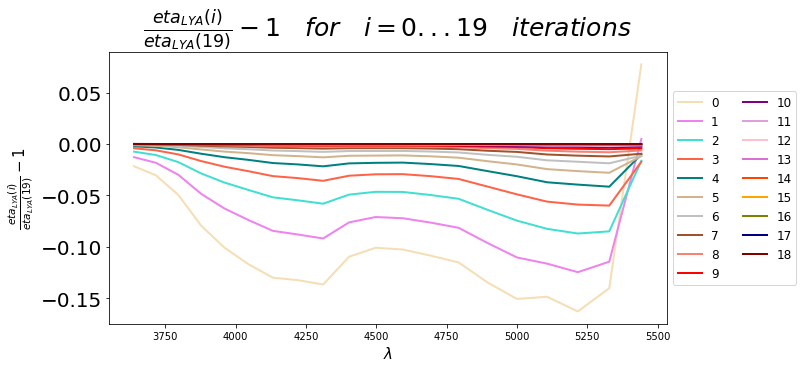

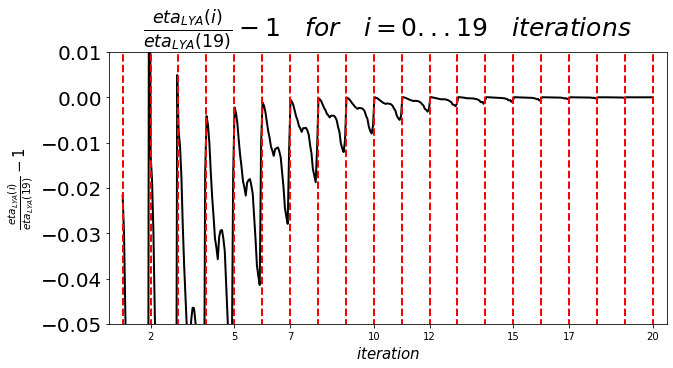

In [31]:
plt.figure()
plt.title(r'$\frac{eta_{LYA}(i)}{eta_{LYA}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
for num,color in zip(range(19),colors[3:]):
    plt.plot(10**loglam_compare_LYA[num],eta_compare_LYA[num]/eta_compare_LYA[-1]-1,label = '%s'%num, color=color)
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\frac{eta_{LYA}(i)}{eta_{LYA}(19)}-1$')
plt.yticks(fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),ncol=2)
plt.show()

plt.figure()
plt.title(r'$\frac{eta_{LYA}(i)}{eta_{LYA}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
diff = np.array(eta_compare_LYA).reshape(-1)/np.tile(eta_compare_LYA[-1],19)-1
plt.plot(np.linspace(1,20,len(np.array(eta_compare_LYA).reshape(-1))),diff,color='black')
for num in range(20):
    plt.plot([(num+1)]*100,np.linspace(min(diff),max(diff),100),color = 'red',linestyle='dashed')
plt.xlabel(r'$iteration$')
plt.ylabel(r'$\frac{eta_{LYA}(i)}{eta_{LYA}(19)}-1$')
plt.yticks(fontsize=20)
xint = []
locs, labels = plt.xticks()
for each in locs:
    xint.append(int(each))
plt.xticks(xint)
plt.xlim(0.5,20.5)
plt.ylim(-0.05,0.01)
plt.show()

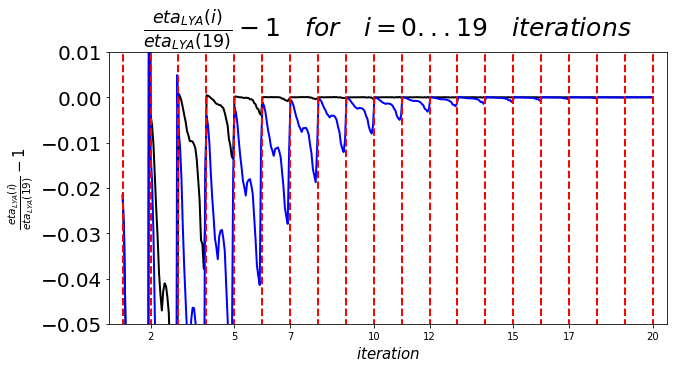

In [32]:
plt.figure()
plt.title(r'$\frac{eta_{LYA}(i)}{eta_{LYA}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
diff = np.array(eta_LYA).reshape(-1)/np.tile(eta_LYA[-1],19)-1
plt.plot(np.linspace(1,20,len(np.array(eta_LYA).reshape(-1))),diff,color='black')
diff = np.array(eta_compare_LYA).reshape(-1)/np.tile(eta_compare_LYA[-1],19)-1
plt.plot(np.linspace(1,20,len(np.array(eta_compare_LYA).reshape(-1))),diff,color='blue')
for num in range(20):
    plt.plot([(num+1)]*100,np.linspace(min(diff),max(diff),100),color = 'red',linestyle='dashed')
plt.xlabel(r'$iteration$')
plt.ylabel(r'$\frac{eta_{LYA}(i)}{eta_{LYA}(19)}-1$')
plt.yticks(fontsize=20)
xint = []
locs, labels = plt.xticks()
for each in locs:
    xint.append(int(each))
plt.xticks(xint)
plt.xlim(0.5,20.5)
plt.ylim(-0.05,0.01)
plt.show()

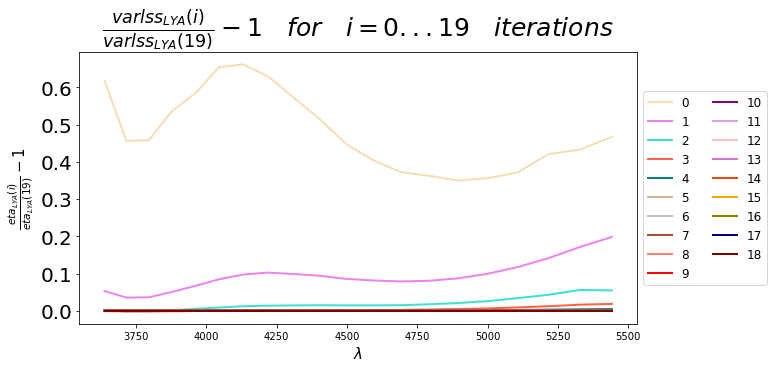

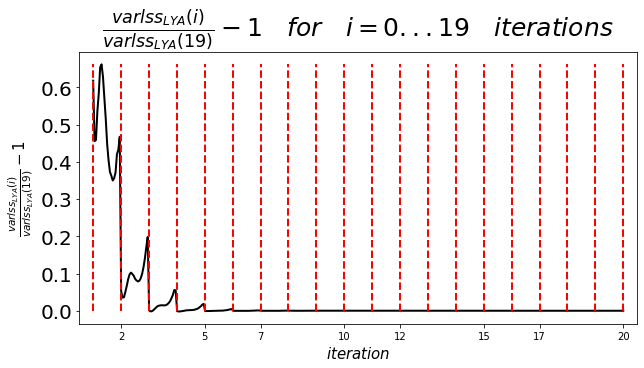

In [22]:
plt.figure()
plt.title(r'$\frac{varlss_{LYA}(i)}{varlss_{LYA}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
for num,color in zip(range(19),colors[3:]):
    plt.plot(10**loglam_LYA[num],var_lss_LYA[num]/var_lss_LYA[-1]-1,label = '%s'%num, color=color)
#plt.plot(10**loglam_LYA[-1],var_lss_LYA[-1]/var_lss_LYA[-1]-1,label = '19',color = 'black')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\frac{eta_{LYA}(i)}{eta_{LYA}(19)}-1$')
plt.yticks(fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),ncol=2)
plt.show()

plt.figure()
plt.title(r'$\frac{varlss_{LYA}(i)}{varlss_{LYA}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
diff = np.array(var_lss_LYA).reshape(-1)/np.tile(var_lss_LYA[-1],19)-1
plt.plot(np.linspace(1,20,len(np.array(eta_LYA).reshape(-1))),diff,color='black')
for num in range(20):
    plt.plot([(num+1)]*100,np.linspace(min(diff),max(diff),100),color = 'red',linestyle='dashed')
plt.xlabel(r'$iteration$')
plt.ylabel(r'$\frac{varlss_{LYA}(i)}{varlss_{LYA}(19)}-1$')
plt.yticks(fontsize=20)
xint = []
locs, labels = plt.xticks()
for each in locs:
    xint.append(int(each))
plt.xticks(xint)
plt.xlim(0.5,20.5)
plt.show()

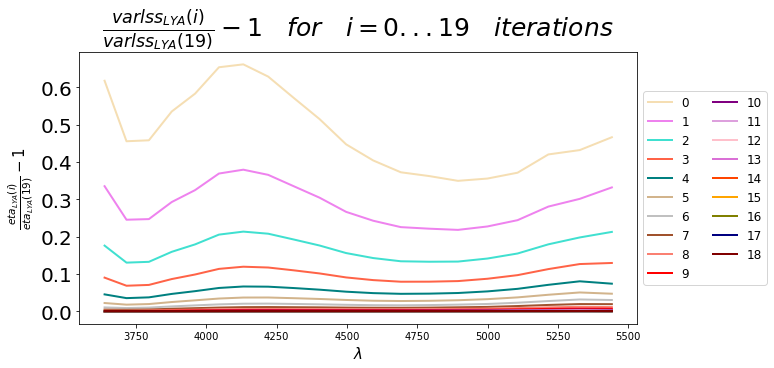

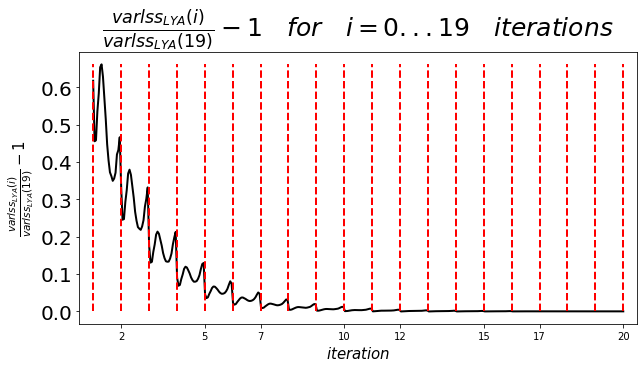

In [23]:
plt.figure()
plt.title(r'$\frac{varlss_{LYA}(i)}{varlss_{LYA}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
for num,color in zip(range(19),colors[3:]):
    plt.plot(10**loglam_compare_LYA[num],var_lss_compare_LYA[num]/var_lss_compare_LYA[-1]-1,label = '%s'%num, color=color)
#plt.plot(10**loglam_LYA[-1],var_lss_LYA[-1]/var_lss_LYA[-1]-1,label = '19',color = 'black')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\frac{eta_{LYA}(i)}{eta_{LYA}(19)}-1$')
plt.yticks(fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),ncol=2)
plt.show()

plt.figure()
plt.title(r'$\frac{varlss_{LYA}(i)}{varlss_{LYA}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
diff = np.array(var_lss_compare_LYA).reshape(-1)/np.tile(var_lss_compare_LYA[-1],19)-1
plt.plot(np.linspace(1,20,len(np.array(eta_compare_LYA).reshape(-1))),diff,color='black')
for num in range(20):
    plt.plot([(num+1)]*100,np.linspace(min(diff),max(diff),100),color = 'red',linestyle='dashed')
plt.xlabel(r'$iteration$')
plt.ylabel(r'$\frac{varlss_{LYA}(i)}{varlss_{LYA}(19)}-1$')
plt.yticks(fontsize=20)
xint = []
locs, labels = plt.xticks()
for each in locs:
    xint.append(int(each))
plt.xticks(xint)
plt.xlim(0.5,20.5)
plt.show()

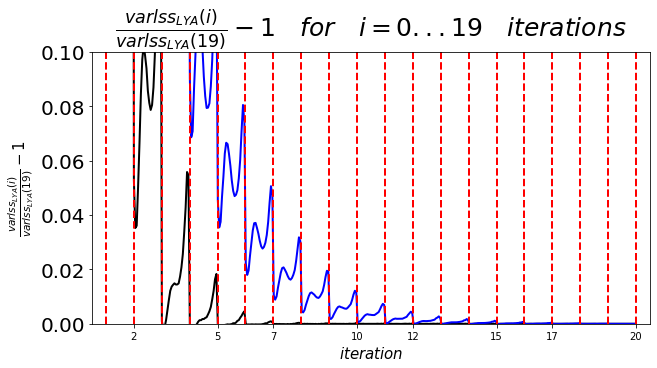

In [33]:
plt.figure()
plt.title(r'$\frac{varlss_{LYA}(i)}{varlss_{LYA}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
diff = np.array(var_lss_LYA).reshape(-1)/np.tile(var_lss_LYA[-1],19)-1
plt.plot(np.linspace(1,20,len(np.array(eta_LYA).reshape(-1))),diff,color='black')
diff = np.array(var_lss_compare_LYA).reshape(-1)/np.tile(var_lss_compare_LYA[-1],19)-1
plt.plot(np.linspace(1,20,len(np.array(eta_compare_LYA).reshape(-1))),diff,color='blue')
for num in range(20):
    plt.plot([(num+1)]*100,np.linspace(min(diff),max(diff),100),color = 'red',linestyle='dashed')
plt.xlabel(r'$iteration$')
plt.ylabel(r'$\frac{varlss_{LYA}(i)}{varlss_{LYA}(19)}-1$')
plt.yticks(fontsize=20)
xint = []
locs, labels = plt.xticks()
for each in locs:
    xint.append(int(each))
plt.xticks(xint)
plt.xlim(0.5,20.5)
plt.ylim(0.,0.1)
plt.show()

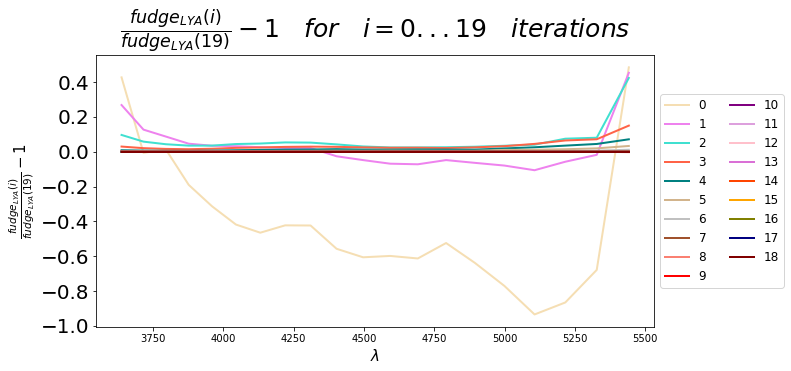

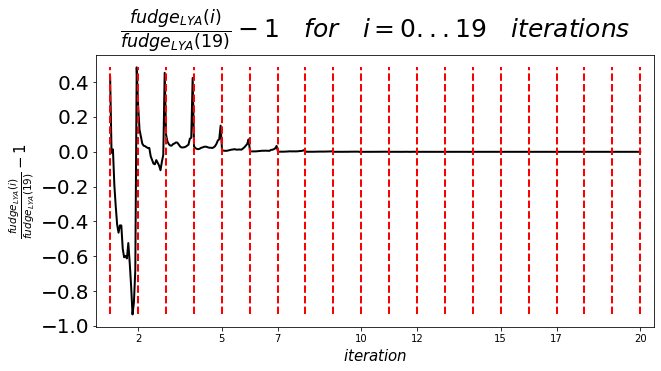

In [24]:
plt.figure()
plt.title(r'$\frac{fudge_{LYA}(i)}{fudge_{LYA}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
for num,color in zip(range(19),colors[3:]):
    plt.plot(10**loglam_LYA[num],fudge_LYA[num]/fudge_LYA[-1]-1,label = '%s'%num, color=color)
#plt.plot(10**loglam_LYA[-1],fudge_LYA[-1]/fudge_LYA[-1]-1,label = '19',color = 'black')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\frac{fudge_{LYA}(i)}{fudge_{LYA}(19)}-1$')
plt.yticks(fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),ncol=2)
plt.show()

plt.figure()
plt.title(r'$\frac{fudge_{LYA}(i)}{fudge_{LYA}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
diff = np.array(fudge_LYA).reshape(-1)/np.tile(fudge_LYA[-1],19)-1
plt.plot(np.linspace(1,20,len(np.array(fudge_LYA).reshape(-1))),diff,color='black')
for num in range(20):
    plt.plot([(num+1)]*100,np.linspace(min(diff),max(diff),100),color = 'red',linestyle='dashed')
plt.xlabel(r'$iteration$')
plt.ylabel(r'$\frac{fudge_{LYA}(i)}{fudge_{LYA}(19)}-1$')

xint = []
locs, labels = plt.xticks()
for each in locs:
    xint.append(int(each))
plt.xticks(xint)
plt.yticks(fontsize=20)
plt.xlim(0.5,20.5)
plt.show()

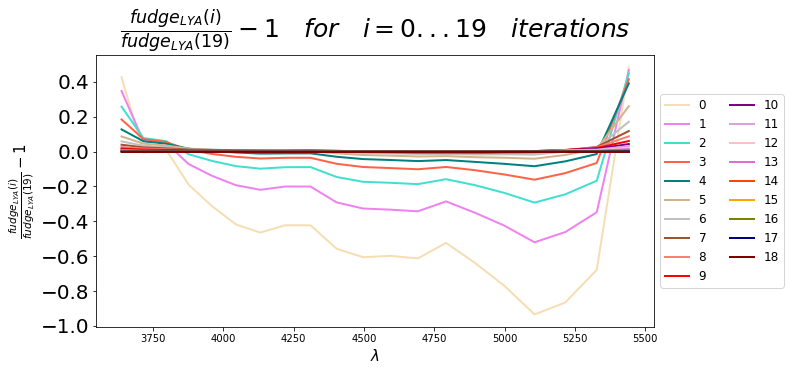

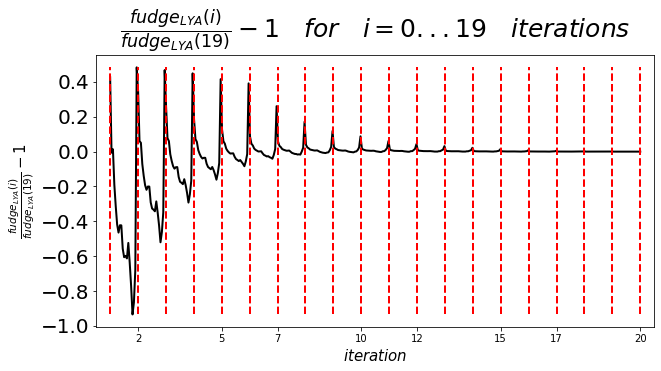

In [25]:
plt.figure()
plt.title(r'$\frac{fudge_{LYA}(i)}{fudge_{LYA}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
for num,color in zip(range(19),colors[3:]):
    plt.plot(10**loglam_compare_LYA[num],fudge_compare_LYA[num]/fudge_compare_LYA[-1]-1,label = '%s'%num, color=color)
#plt.plot(10**loglam_LYA[-1],fudge_LYA[-1]/fudge_LYA[-1]-1,label = '19',color = 'black')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\frac{fudge_{LYA}(i)}{fudge_{LYA}(19)}-1$')
plt.yticks(fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),ncol=2)
plt.show()

plt.figure()
plt.title(r'$\frac{fudge_{LYA}(i)}{fudge_{LYA}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
diff = np.array(fudge_compare_LYA).reshape(-1)/np.tile(fudge_compare_LYA[-1],19)-1
plt.plot(np.linspace(1,20,len(np.array(fudge_compare_LYA).reshape(-1))),diff,color='black')
for num in range(20):
    plt.plot([(num+1)]*100,np.linspace(min(diff),max(diff),100),color = 'red',linestyle='dashed')
plt.xlabel(r'$iteration$')
plt.ylabel(r'$\frac{fudge_{LYA}(i)}{fudge_{LYA}(19)}-1$')

xint = []
locs, labels = plt.xticks()
for each in locs:
    xint.append(int(each))
plt.xticks(xint)
plt.yticks(fontsize=20)
plt.xlim(0.5,20.5)
plt.show()

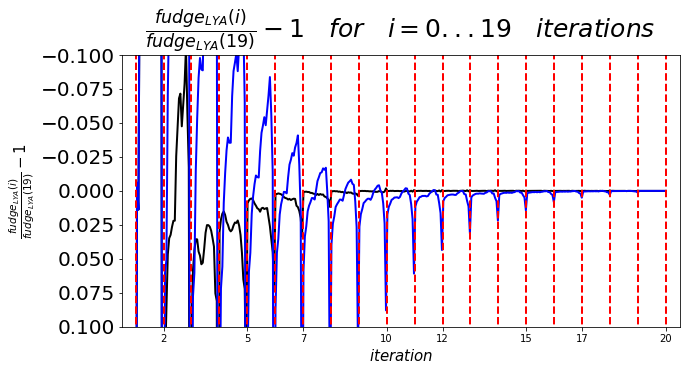

In [34]:
plt.figure()
plt.title(r'$\frac{fudge_{LYA}(i)}{fudge_{LYA}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
diff = np.array(fudge_LYA).reshape(-1)/np.tile(fudge_LYA[-1],19)-1
plt.plot(np.linspace(1,20,len(np.array(fudge_LYA).reshape(-1))),diff,color='black')
diff = np.array(fudge_compare_LYA).reshape(-1)/np.tile(fudge_compare_LYA[-1],19)-1
plt.plot(np.linspace(1,20,len(np.array(fudge_compare_LYA).reshape(-1))),diff,color='blue')
for num in range(20):
    plt.plot([(num+1)]*100,np.linspace(min(diff),max(diff),100),color = 'red',linestyle='dashed')
plt.xlabel(r'$iteration$')
plt.ylabel(r'$\frac{fudge_{LYA}(i)}{fudge_{LYA}(19)}-1$')

xint = []
locs, labels = plt.xticks()
for each in locs:
    xint.append(int(each))
plt.xticks(xint)
plt.yticks(fontsize=20)
plt.xlim(0.5,20.5)
plt.ylim(0.1,-0.1)
plt.show()

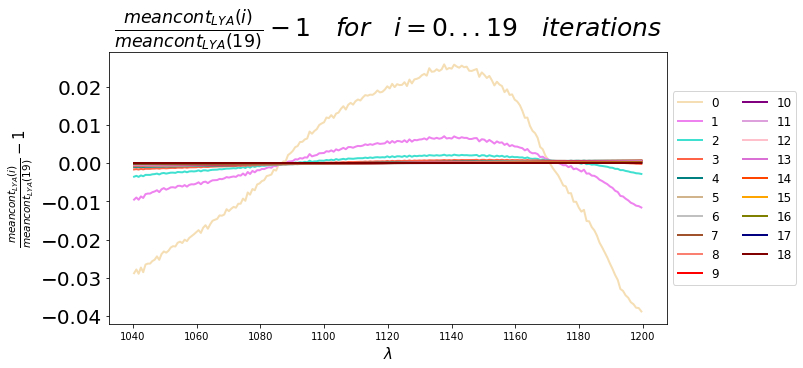

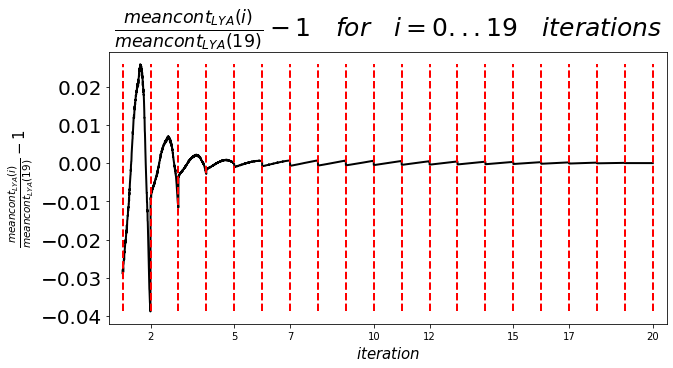

In [26]:
plt.figure()
plt.title(r'$\frac{meancont_{LYA}(i)}{meancont_{LYA}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
for num,color in zip(range(19),colors[3:]):
    plt.plot(10**loglam_rest_LYA[num],mean_cont_LYA[num]/mean_cont_LYA[-1]-1,label = '%s'%num, color=color)
#plt.plot(10**loglam_rest_LYA[-1],mean_cont_LYA[-1]/mean_cont_LYA[-1]-1,label = '19',color = 'black')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\frac{meancont_{LYA}(i)}{meancont_{LYA}(19)}-1$')
plt.yticks(fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),ncol=2)
plt.show()

plt.figure()
plt.title(r'$\frac{meancont_{LYA}(i)}{meancont_{LYA}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
diff = np.array(mean_cont_LYA).reshape(-1)/np.tile(mean_cont_LYA[-1],19)-1
plt.plot(np.linspace(1,20,len(np.array(mean_cont_LYA).reshape(-1))),diff,color='black')
for num in range(20):
    plt.plot([(num+1)]*100,np.linspace(min(diff),max(diff),100),color = 'red',linestyle='dashed')
plt.xlabel(r'$iteration$')
plt.ylabel(r'$\frac{meancont_{LYA}(i)}{meancont_{LYA}(19)}-1$')
plt.yticks(fontsize=20)
xint = []
locs, labels = plt.xticks()
for each in locs:
    xint.append(int(each))
plt.xticks(xint)
plt.xlim(0.5,20.5)
plt.show()

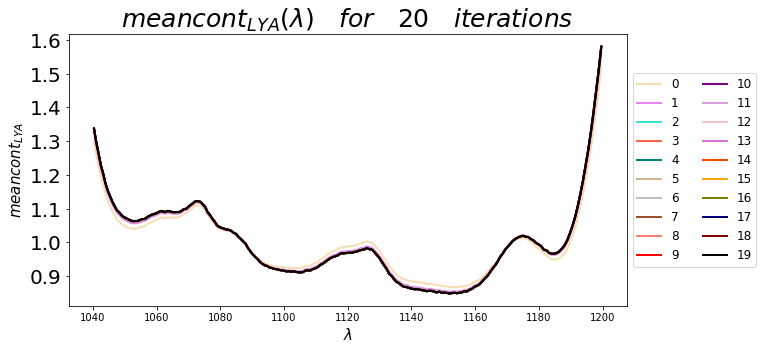

In [27]:
plt.figure()
plt.title(r'$meancont_{LYA}(\lambda)\quad for\quad 20\quad iterations$', fontsize=25)
for num,color in zip(range(19),colors[3:]):
    plt.plot(10**loglam_rest_LYA[num],mean_cont_LYA[num],label = '%s'%num,color = color)
plt.plot(10**loglam_rest_LYA[-1],mean_cont_LYA[-1],label = '19',color = 'black')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$meancont_{LYA}$')
plt.yticks(fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),ncol=2)
plt.show()

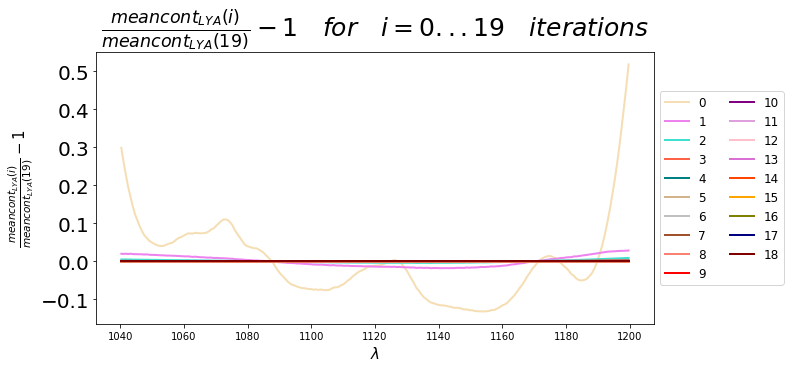

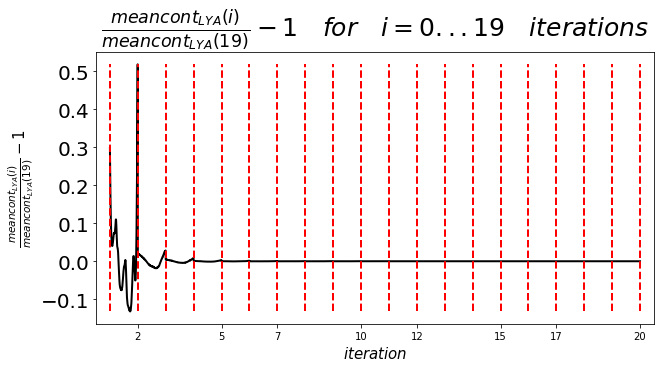

In [28]:
plt.figure()
plt.title(r'$\frac{meancont_{LYA}(i)}{meancont_{LYA}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
for num,color in zip(range(19),colors[3:]):
    plt.plot(10**loglam_rest_compare_LYA[num],mean_cont_compare_LYA[num]/mean_cont_compare_LYA[-1]-1,label = '%s'%num, color=color)
#plt.plot(10**loglam_rest_LYA[-1],mean_cont_LYA[-1]/mean_cont_LYA[-1]-1,label = '19',color = 'black')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\frac{meancont_{LYA}(i)}{meancont_{LYA}(19)}-1$')
plt.yticks(fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),ncol=2)
plt.show()

plt.figure()
plt.title(r'$\frac{meancont_{LYA}(i)}{meancont_{LYA}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
diff = np.array(mean_cont_compare_LYA).reshape(-1)/np.tile(mean_cont_compare_LYA[-1],19)-1
plt.plot(np.linspace(1,20,len(np.array(mean_cont_compare_LYA).reshape(-1))),diff,color='black')
for num in range(20):
    plt.plot([(num+1)]*100,np.linspace(min(diff),max(diff),100),color = 'red',linestyle='dashed')
plt.xlabel(r'$iteration$')
plt.ylabel(r'$\frac{meancont_{LYA}(i)}{meancont_{LYA}(19)}-1$')
plt.yticks(fontsize=20)
xint = []
locs, labels = plt.xticks()
for each in locs:
    xint.append(int(each))
plt.xticks(xint)
plt.xlim(0.5,20.5)
plt.show()

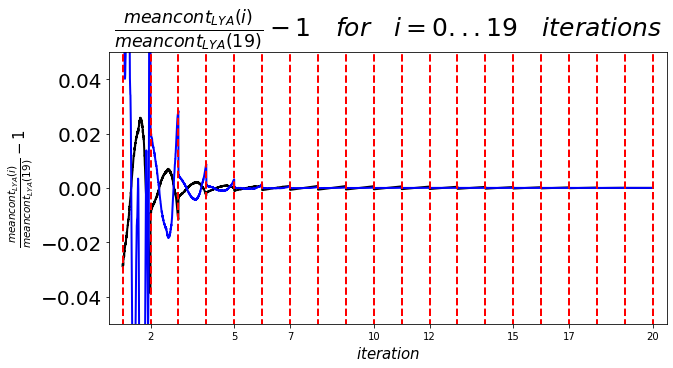

In [36]:
plt.figure()
plt.title(r'$\frac{meancont_{LYA}(i)}{meancont_{LYA}(19)}-1\quad for\quad i=0...19\quad iterations$', fontsize=25)
diff = np.array(mean_cont_LYA).reshape(-1)/np.tile(mean_cont_LYA[-1],19)-1
plt.plot(np.linspace(1,20,len(np.array(mean_cont_LYA).reshape(-1))),diff,color='black')
diff = np.array(mean_cont_compare_LYA).reshape(-1)/np.tile(mean_cont_compare_LYA[-1],19)-1
plt.plot(np.linspace(1,20,len(np.array(mean_cont_compare_LYA).reshape(-1))),diff,color='blue')
for num in range(20):
    plt.plot([(num+1)]*100,np.linspace(min(diff),max(diff),100),color = 'red',linestyle='dashed')
plt.xlabel(r'$iteration$')
plt.ylabel(r'$\frac{meancont_{LYA}(i)}{meancont_{LYA}(19)}-1$')
plt.yticks(fontsize=20)
xint = []
locs, labels = plt.xticks()
for each in locs:
    xint.append(int(each))
plt.xticks(xint)
plt.xlim(0.5,20.5)
plt.ylim(-0.05,0.05)
plt.show()